In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import optimize
from scipy.optimize import basinhopping
from scipy import stats

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
def f(x):
    return (4 - 2.1*pow(x[0],2) + pow(x[0],4)/3)*pow(x[0],2) + x[0]*x[1] + (4*pow(x[1],2) - 4)*pow(x[1],2)

Text(0.5, 0, 'f(x,y)')

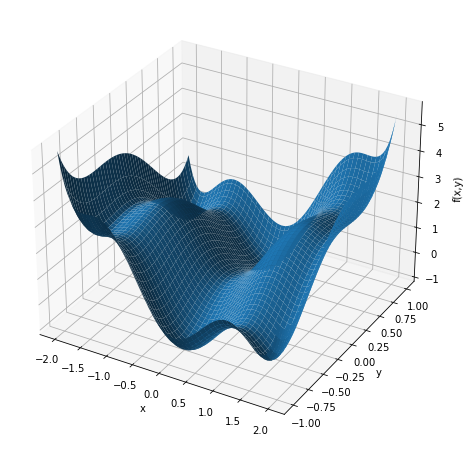

In [3]:
#3d plot
from mpl_toolkits import mplot3d

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x_grid, y_grid = np.meshgrid(x, y)
z = f(np.meshgrid(x, y))

fig, ax = plt.subplots(figsize=(10, 8))

ax = plt.axes(projection="3d")
ax.plot_surface(x_grid, y_grid, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

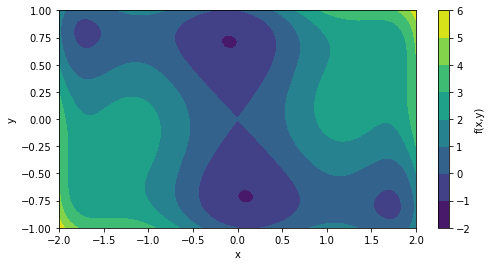

In [4]:
#plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlabel("x")
ax.set_ylabel("y")
cs = ax.contourf(x, y, z) 
fig.colorbar(cs, label="f(x,y)")
plt.show()

In [5]:
#global minima
x0=[0,1]
solution1 = optimize.minimize(f, x0)
print("Initial guesss: ",x0)
print("global min: x = [%.4f, %.4f], f(x0) = %.4f" % (solution1.x[0], solution1.x[1], solution1.fun))

x0=[0,-1]
solution2 = optimize.minimize(f, x0)
print("\nInitial guesss: ",x0)
print("global min: x = [%.4f, %.4f], f(x0) = %.4f" % (solution2.x[0], solution2.x[1], solution2.fun))

x0=[0,0]
solution0 = optimize.minimize(f, x0)
print("\nInitial guesss: ",x0)
print("global min using minimize: x = [%.4f, %.4f], f(x0) = %.4f" % (solution0.x[0], solution0.x[1], solution0.fun))
solution = basinhopping(f, x0) 
print("global min using basinhopping: x = [%.4f, %.4f], f(x0) = %.4f" % (solution.x[0], solution.x[1], solution.fun))

Initial guesss:  [0, 1]
global min: x = [-0.0898, 0.7127], f(x0) = -1.0316

Initial guesss:  [0, -1]
global min: x = [0.0898, -0.7127], f(x0) = -1.0316

Initial guesss:  [0, 0]
global min using minimize: x = [0.0000, 0.0000], f(x0) = 0.0000
global min using basinhopping: x = [-0.0898, 0.7127], f(x0) = -1.0316


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Fit of max temperatures:
parameters:  [132.80937319   6.73581612   2.29443465  15.77932635]
covariance:
 [[ 2.03790566e+02 -2.15089313e-02  2.17788364e+00 -1.61244587e+01]
 [-2.15089313e-02  6.31512353e-03 -2.12212201e-04  1.91628878e-03]
 [ 2.17788364e+00 -2.12212201e-04  2.75431290e-02 -1.70927324e-01]
 [-1.61244587e+01  1.91628878e-03 -1.70927324e-01  1.38427087e+00]]

Fit of min temperatures:
parameters:  [260.76390987   7.16452594   1.97590023  38.67906252]
covariance:
 [[ 1.78560879e+02 -1.08267089e-02  8.74435259e-01 -1.45310722e+01]
 [-1.08267089e-02  2.22850059e-03 -4.92555476e-05  1.09102132e-03]
 [ 8.74435259e-01 -4.92555476e-05  5.77328040e-03 -7.06521192e-02]
 [-1.45310722e+01  1.09102132e-03 -7.06521192e-02  1.41331006e+00]]


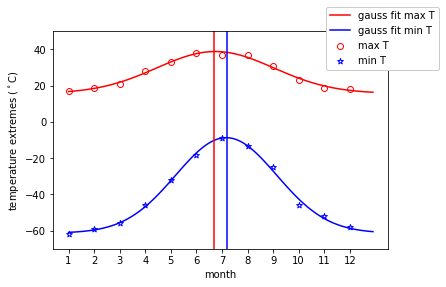

In [6]:
month = np.arange(1,13,1)
maxT = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
minT = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

fig, ax = plt.subplots()
ax.scatter(month, maxT, c='w', edgecolors='r', marker='o', label='max T')
ax.scatter(month, minT, c ='w', edgecolors='b', marker='*', label='min T')
ax.set_ylabel('temperature extremes ($^\circ$C)')
ax.set_xlabel('month')
ax.set_ylim(-70,50)
plt.xticks(month)

def gaus(x,a,m,sigma,offset):
    return offset + a*stats.norm.pdf(x,m,sigma)

minT_scale = minT+100

popt_maxT,pcov_maxT = optimize.curve_fit(gaus,month,maxT,p0=[1,7,3,0])
popt_minT,pcov_minT = optimize.curve_fit(gaus,month,minT_scale,p0=[1,7,1,0])

x = np.arange(1,13,0.1)

y_maxT = gaus(x, popt_maxT[0], popt_maxT[1], popt_maxT[2], popt_maxT[3])
y_minT = gaus(x, popt_minT[0], popt_minT[1], popt_minT[2], popt_minT[3])-100

print("Fit of max temperatures:")
print("parameters: ",popt_maxT)
print("covariance:\n",pcov_maxT)

print("\nFit of min temperatures:")
print("parameters: ",popt_minT)
print("covariance:\n",pcov_minT)

ax.plot(x, y_maxT, color='r', label='gauss fit max T')
ax.plot(x, y_minT, color='b', label='gauss fit min T')

ax.axvline(x[np.argmax(y_minT)],color="b")
ax.axvline(x[np.argmax(y_maxT)],color="r")

ax.legend(bbox_to_anchor=(0.8, 0.8), framealpha=1)

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [7]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [8]:
data = pd.read_pickle('/home/marija/lab/data/residuals_261.pkl')
l = data.tolist()
r = np.array(l['residuals'])

Fit:
parameters:  [ 1.24680384e+03 -8.53771426e-02  2.14926080e-01  1.01848777e+02]
covariance:
 [[ 1.54330382e+03 -1.91428993e-07  1.77357397e-01 -5.14433251e+02]
 [-1.91428993e-07  3.78531026e-05 -3.56244242e-11  1.14232709e-07]
 [ 1.77357397e-01 -3.56244242e-11  4.56174251e-05 -5.91187907e-02]
 [-5.14433251e+02  1.14232709e-07 -5.91187907e-02  4.50140529e+02]]


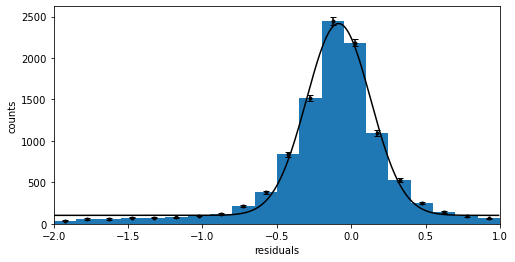

n degrees of freedom = 19
chi2 = 363.61185790518874
p-value = 0.0


In [9]:
fig, ax = plt.subplots(figsize=(8, 4))

bin_counts, bin_edges, _ = ax.hist(r, bins=20, range=[-2, 1])
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
error = np.array([np.sqrt(i) for i in bin_counts])
ax.errorbar(x=bin_centres, y=bin_counts, yerr=error, fmt='.', capsize=3, color='black')

ax.set_xlim(-2,1)
ax.set_ylabel('counts')
ax.set_xlabel('residuals')

def gauss(x,a,m,sigma,offset):
    return offset + a*stats.norm.pdf(x,m,sigma)

popt,pcov = optimize.curve_fit(gauss,bin_centres,bin_counts,p0=[0,0,1,0])
print("Fit:")
print("parameters: ",popt)
print("covariance:\n",pcov)


x = np.arange(-2,1,0.01)
y = gauss(x, popt[0], popt[1], popt[2],  popt[3])

ax.plot(x, y, color='black')

plt.show()


#goodness-of-fit
ndof = bin_centres.size - 1
print("n degrees of freedom =", ndof)
#chi^2
chi2 = np.sum(((gauss(bin_centres, popt[0], popt[1], popt[2],  popt[3]) - bin_counts)**2) / error**2)
print("chi2 =", chi2)
#p-value
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)
#The fit is unsatisfactory

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [10]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

In [11]:
with open('/home/marija/lab/data/munich_temperatures_average_with_bad_data.txt', mode='r') as data_file:
    data = pd.read_csv(data_file, delimiter=' ', header=None, names=['time', 'temperature'])
data

,time,temperature
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


In [12]:
new_df = data[(data['time'] >= 2008) & (data['time'] <= 2012)]
new_df.reset_index(drop=True, inplace=True)
new_df

,time,temperature
0,2008.00274,-2.94444
1,2008.00548,-2.66667
2,2008.00821,-2.66667
3,2008.01095,-2.00000
4,2008.01369,-1.94444
...,...,...
1456,2011.98836,3.44444
1457,2011.99110,1.27778
1458,2011.99384,2.88889
1459,2011.99658,1.83333


Fit parameters:
a = -9.988133676460334 	b = 12.333023014281954 	c = 9.384114874727588

Overall average temperature in Munich predicted by the model:  12.333023014281954
Typical daily average values predicted by the model for the coldest time of year 0.6040188017327459
Typical daily average values predicted by the model for the hottest time of year 19.372248551187923


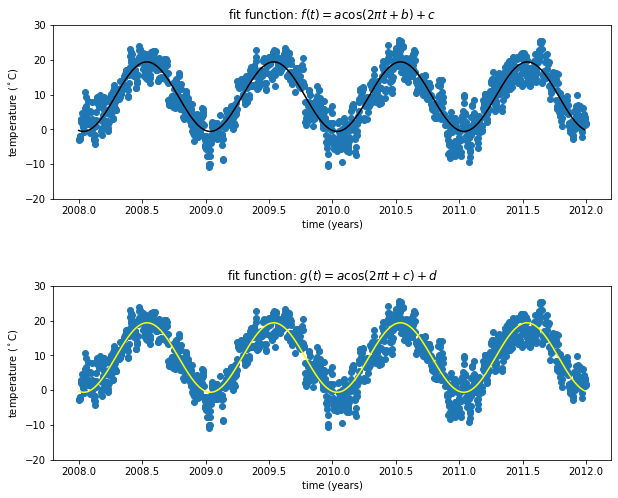

RSS for f(x):  34359.85859996652
RSS for g(x):  34352.79405375781

Fisher F-test: 
CL: 0.584 , additional parameter necessary: NO


In [13]:
t = np.array(new_df['time'])
Temp = np.array(new_df['temperature'])

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10, 8))
for i in range(2):
    axs[i].scatter(t,Temp)
    axs[i].set_ylim(-20,30)
    axs[i].set_ylabel('temperature ($^\circ$C)')
    axs[i].set_xlabel('time (years)')


#fit f
def f(t,a,b,c):
    return a*np.cos(2*np.pi*t + b)+c

popt_f,pcov_f = optimize.curve_fit(f,t,Temp)

x = np.arange(2008,2012,0.01)
y = f(x, popt_f[0], popt_f[1], popt_f[2])

axs[0].plot(x, y, color='black')
axs[0].set_title("fit function: $f(t)=a \cos (2 \pi t+b)+c$")


print("Fit parameters:")
print("a =", popt_f[0], "\tb =", popt_f[1], "\tc =", popt_f[2])
print("\nOverall average temperature in Munich predicted by the model: ", popt_f[1])
print("Typical daily average values predicted by the model for the coldest time of year",np.abs(popt_f[0])-popt_f[2])
print("Typical daily average values predicted by the model for the hottest time of year",np.abs(popt_f[0])+popt_f[2])


#fit g
def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*t*b + c)+d

popt_g,pcov_g = optimize.curve_fit(g,t,Temp)

y_g = g(x, popt_g[0], popt_g[1], popt_g[2],  popt_g[3])

axs[1].plot(x, y_g, color='yellow')
axs[1].set_title("fit function: $g(t)=a \cos (2 \pi t+c)+d$")

fig.subplots_adjust(hspace=.5)
plt.show()


#RSS (squared sum of the residuals of the fit) for 𝑓(𝑥) and 𝑔(𝑥)
RSS_f = np.sum((f(t, popt_f[0], popt_f[1], popt_f[2]) - Temp)**2)
RSS_g = np.sum((g(t, popt_g[0], popt_g[1], popt_g[2], popt_g[3]) - Temp)**2)
print("RSS for f(x): ",RSS_f)
print("RSS for g(x): ",RSS_g)

#F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

N=t.size
ndof_f = 3-1
ndof_g = 4-1
print("\nFisher F-test: ")
cl = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, N, verbose=True)